#Libraries and Dataset

Importing all the libraries and dataset

In [2]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Joints/train_data.csv')
df

,id,Gender,Umur,Izin_Mengemudi,Kode_Wilayah,Tanggal_Asuransi,Tahun_Kendaraan,Biaya,Sourcing_Channel,Hari_Diasuransikan,Target
0,58609,Pria,65.0,1.0,48.0,11/4/2018,NaN,2630.0,15.0,131.0,0
1,208222,Wanita,22.0,1.0,21.0,2/2/2018,<1 Tahun,NaN,NaN,NaN,0
2,345428,Wanita,24.0,1.0,NaN,5/12/2019,<1 Tahun,NaN,NaN,181.0,0
3,236831,Pria,58.0,1.0,46.0,NaN,1-2 Tahun,NaN,124.0,NaN,0
4,280181,Pria,NaN,1.0,36.0,11/19/2019,>2 Tahun,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...
382149,255964,Pria,52.0,1.0,28.0,NaN,>2 Tahun,NaN,NaN,217.0,1
382150,102144,Pria,23.0,1.0,NaN,8/27/2018,<1 Tahun,29282.0,152.0,260.0,0
382151,480784,Pria,NaN,1.0,3.0,9/12/2019,NaN,29217.0,NaN,NaN,1
382152,321214,NaN,51.0,1.0,NaN,8/8/2019,NaN,42063.0,26.0,148.0,0


#EDA

**Data Fields**
* **Id:** Unique identifier untuk setiap pelanggan
* **Gender:** Jenis kelamin pelanggan
* **Umur:** Umur pelanggan saat ini
* **Izin Mengemudi:** Kepemilikan SIM (1: Yes, 0: No)
* **Kode Wilayah:** Unique code tempat tinggal pelanggan
* **Tanggal Asuransi:** Tanggal pelanggan mulai melakukan layanan asuransi
* **Tahun kendaraan:** Lama waktu kepemilikan kendaraan
* **Biaya:** Biaya asuransi yg perlu dibayarkan pelanggan tahun ini
* **Sourcing Channel:** Nomor channel pelanggan mendapatkan informasi mengenai asuransi
* **Hari Diasuransikan:** Lama hari pelanggan telah menjalin kerjasama asuransi
* **Target:** Pelanggan tertarik melanjutkan asuransi = 1, sebaliknya = 0  
  
*Terdapat 10 features dan 382154 instances*

##All Variables

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382154 entries, 0 to 382153
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  382154 non-null  int64  
 1   Gender              350386 non-null  object 
 2   Umur                285896 non-null  float64
 3   Izin_Mengemudi      305507 non-null  float64
 4   Kode_Wilayah        298080 non-null  float64
 5   Tanggal_Asuransi    304070 non-null  object 
 6   Tahun_Kendaraan     315714 non-null  object 
 7   Biaya               255617 non-null  float64
 8   Sourcing_Channel    298509 non-null  float64
 9   Hari_Diasuransikan  306488 non-null  float64
 10  Target              382154 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 32.1+ MB


In [ ]:
(df.isnull().sum()/len(df))*100

id                     0.000000
Gender                 8.312879
Umur                  25.188275
Izin_Mengemudi        20.056574
Kode_Wilayah          22.000031
Tanggal_Asuransi      20.432600
Tahun_Kendaraan       17.385661
Biaya                 33.111520
Sourcing_Channel      21.887773
Hari_Diasuransikan    19.799871
Target                 0.000000
dtype: float64

* Tidak ada missing value pada target
* Seluruh feature mengandung missing value, kecuali id
* Diperlukan penanganan missing value

##Target

In [ ]:
import matplotlib.pyplot as plt

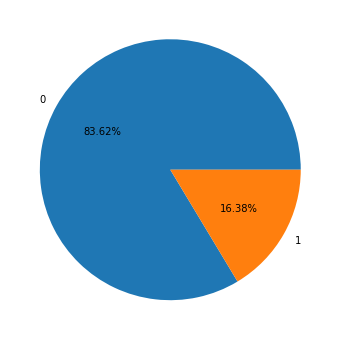

In [ ]:
def pie_chart(dataset, variable):
  f, ax = plt.subplots(figsize=[6,6])
  a = dataset[variable].value_counts()
  plt.pie(x = a.values, labels = a.keys(), autopct = '%.2f%%')
pie_chart(df, 'Target')

* Pembagian kelas pada target sangat imbalanced
* Perlu dilakukan penanganan data yang imbalanced

##ID

In [ ]:
len(df['id'].value_counts())/len(df)

1.0

* Setiap instances memiliki id yang unik
* Tidak ada data yang duplikat

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


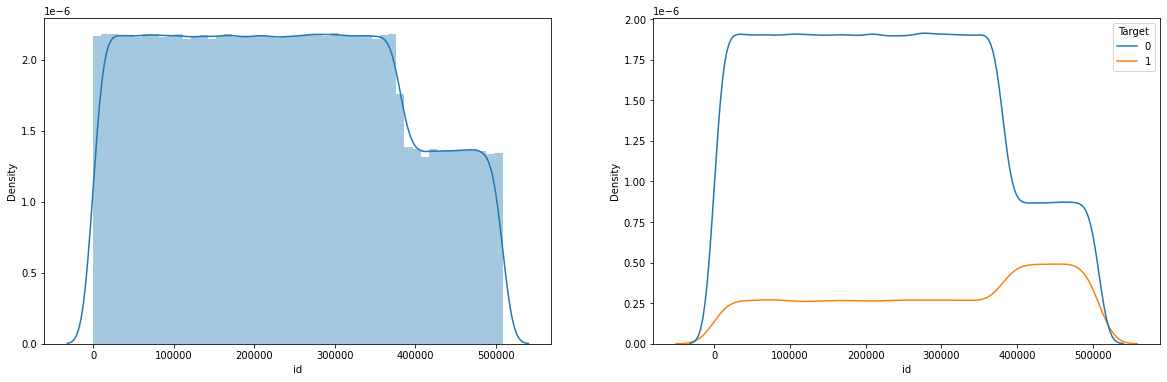

In [ ]:
numerik(df, 'id')

##Gender

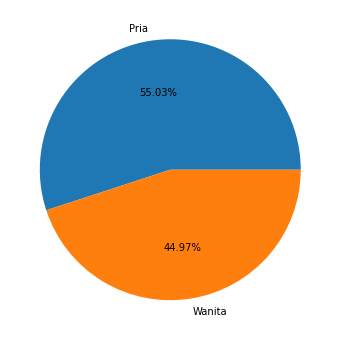

In [ ]:
pie_chart(df, 'Gender')

In [ ]:
def kategorik(dataset, variabel):
  pie_chart(dataset, variabel)
  sns.catplot(kind='count', x=variabel, data=dataset, hue = 'Target')

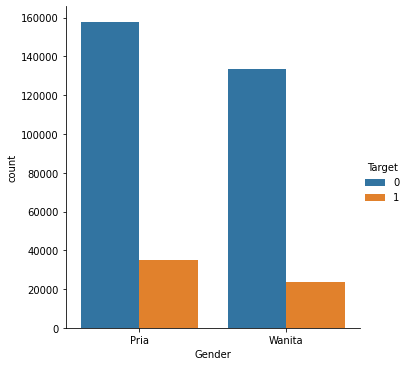

In [ ]:
import seaborn as sns
sns.catplot(kind='count', x='Gender', data=df, hue='Target')

##Umur

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


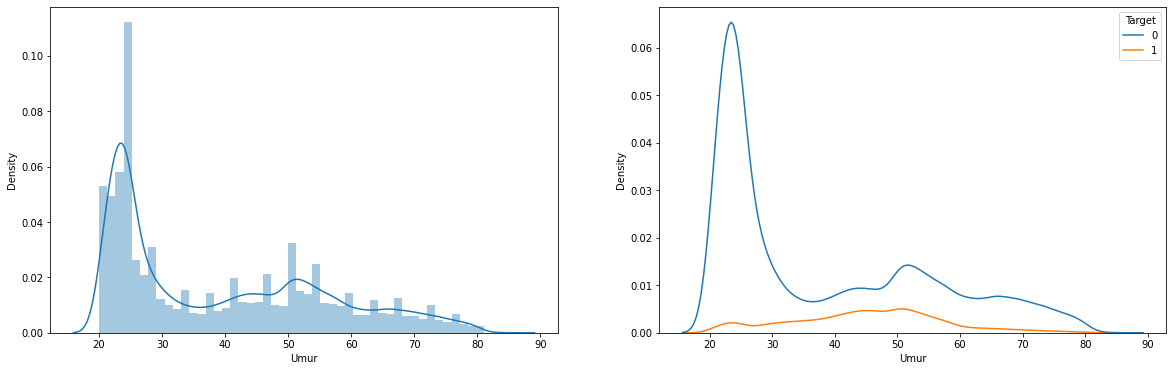

In [ ]:
def numerik(dataset, variabel):
  f, ax = plt.subplots(1, 2, figsize = [20,6])
  sns.distplot(dataset[variabel], ax = ax[0])
  sns.kdeplot(data = dataset, x = variabel,hue = 'Target', ax = ax[1])
numerik(df, 'Umur')

In [ ]:
print("Range umur pelanggan antara {} sampai {}".format(df['Umur'].min(), df['Umur'].max()))

Range umur pelanggan antara 20.0 sampai 85.0


In [ ]:
len(df[df.Umur <= 32])/(len(df.Umur)-df.Umur.isnull().sum())

0.49651271791140833

In [ ]:
df.Umur.isnull().sum()

96258

In [ ]:
import numpy as np
len(df[df.Umur != np.NaN])

382154

##Izin Mengemudi

In [ ]:
df['Izin_Mengemudi'].value_counts()

1.0    305145
0.0       362
Name: Izin_Mengemudi, dtype: int64

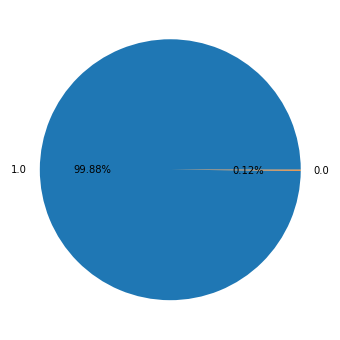

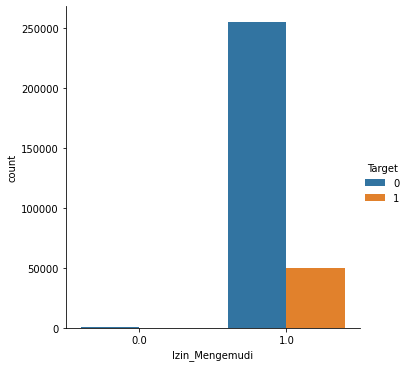

In [ ]:
kategorik(df, 'Izin_Mengemudi')

In [ ]:
df.Target[df.Izin_Mengemudi == 0.0].value_counts()

0    346
1     16
Name: Target, dtype: int64

Hampir semua pelanggan memiliki izin mengemudi. Hanya 0,12% yang tidak memiliki. Yang tidak memiliki pun tidak menunjukkan suatu pola tertentu. Karena kurangnya variabilitas pada feature ini, maka sebaiknya dihapus.

##Kode Wilayah

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


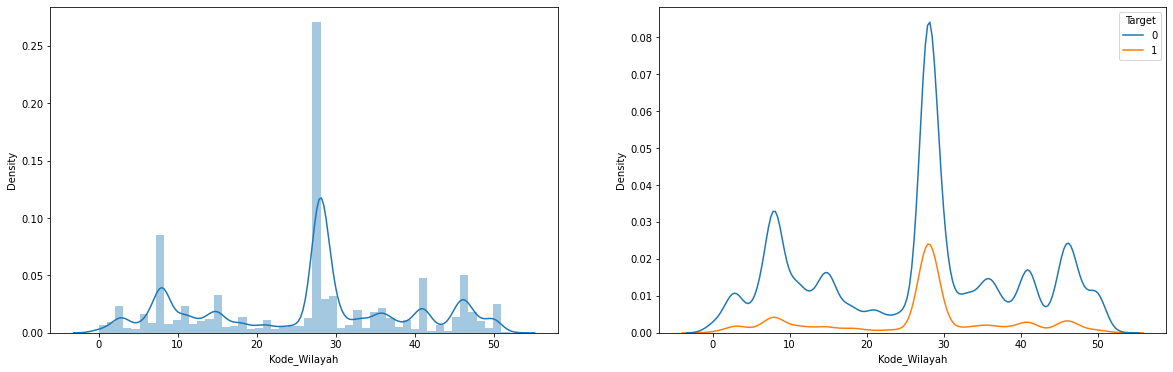

In [ ]:
numerik(df, 'Kode_Wilayah')

##Tanggal Asuransi

In [ ]:
df.Tanggal_Asuransi

0          11/4/2018
1           2/2/2018
2          5/12/2019
3                NaN
4         11/19/2019
             ...    
382149           NaN
382150     8/27/2018
382151     9/12/2019
382152      8/8/2019
382153    10/24/2019
Name: Tanggal_Asuransi, Length: 382154, dtype: object

In [ ]:
# df_nonull = df[df['Tanggal_Asuransi'].isnull() == False]
df_nonull[['Bulan', 'Tanggal', 'Tahun']] = df_nonull.Tanggal_Asuransi.str.split("/", expand=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [ ]:
df_nonull

,id,Gender,Umur,Izin_Mengemudi,Kode_Wilayah,Tanggal_Asuransi,Tahun_Kendaraan,Biaya,Sourcing_Channel,Hari_Diasuransikan,Target,Bulan,Tanggal,Tahun
0,58609,Pria,65.0,1.0,48.0,11/4/2018,NaN,2630.0,15.0,131.0,0,11,4,2018
1,208222,Wanita,22.0,1.0,21.0,2/2/2018,<1 Tahun,NaN,NaN,NaN,0,2,2,2018
2,345428,Wanita,24.0,1.0,NaN,5/12/2019,<1 Tahun,NaN,NaN,181.0,0,5,12,2019
4,280181,Pria,NaN,1.0,36.0,11/19/2019,>2 Tahun,NaN,NaN,NaN,1,11,19,2019
5,31680,Pria,55.0,1.0,28.0,12/10/2019,1-2 Tahun,54135.0,52.0,285.0,0,12,10,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382148,178224,Wanita,NaN,1.0,28.0,12/13/2019,NaN,22158.0,NaN,40.0,0,12,13,2019
382150,102144,Pria,23.0,1.0,NaN,8/27/2018,<1 Tahun,29282.0,152.0,260.0,0,8,27,2018
382151,480784,Pria,NaN,1.0,3.0,9/12/2019,NaN,29217.0,NaN,NaN,1,9,12,2019
382152,321214,NaN,51.0,1.0,NaN,8/8/2019,NaN,42063.0,26.0,148.0,0,8,8,2019


In [ ]:
df_nonull.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 304070 entries, 0 to 382153
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  304070 non-null  int64  
 1   Gender              277397 non-null  object 
 2   Umur                231143 non-null  float64
 3   Izin_Mengemudi      243243 non-null  float64
 4   Kode_Wilayah        237120 non-null  float64
 5   Tanggal_Asuransi    304070 non-null  object 
 6   Tahun_Kendaraan     252353 non-null  object 
 7   Biaya               201064 non-null  float64
 8   Sourcing_Channel    241252 non-null  float64
 9   Hari_Diasuransikan  243909 non-null  float64
 10  Target              304070 non-null  int64  
 11  Bulan               304070 non-null  object 
 12  Tanggal             304070 non-null  object 
 13  Tahun               304070 non-null  object 
dtypes: float64(6), int64(2), object(6)
memory usage: 44.8+ MB


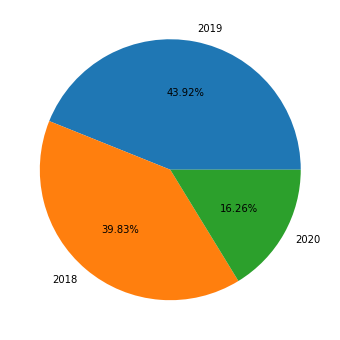

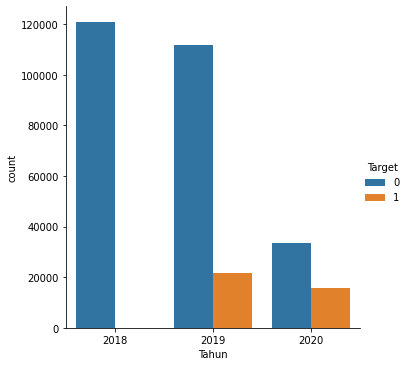

In [ ]:
kategorik(df_nonull, 'Tahun')

Tahun 2018 kok gaada yg lanjut asuransi ya?

In [ ]:
a = len(df_nonull[df_nonull.Tahun == '2018'])
(df_nonull.Target[df_nonull.Tahun=='2018'].value_counts())/a*100

0    99.926505
1     0.073495
Name: Target, dtype: float64

Ternyata 99,92% orang yang menjalin kerjasama asuransi sejak tahun 2018 memilih untuk tidak melanjutkan

In [ ]:
b = len(df_nonull[df_nonull.Tahun == '2019'])
(df_nonull.Target[df_nonull.Tahun=='2019'].value_counts())/b*100

0    83.789734
1    16.210266
Name: Target, dtype: float64

In [ ]:
c = len(df_nonull[df_nonull.Tahun == '2020'])
(df_nonull.Target[df_nonull.Tahun=='2020'].value_counts())/c*100

0    68.111192
1    31.888808
Name: Target, dtype: float64

Kesimpulannya, semakin lama seseorang telah ikut asuransi, semakin sedikit juga orang yang melanjutkan

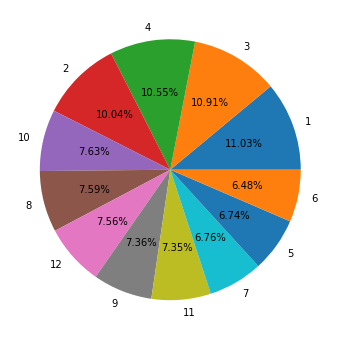

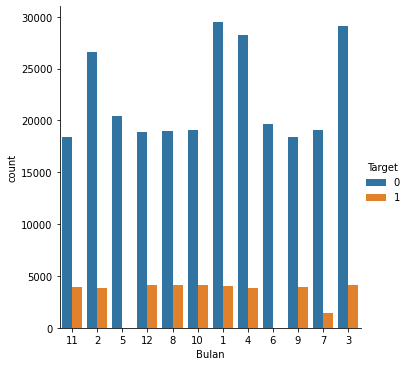

In [ ]:
kategorik(df_nonull, 'Bulan')

Bulan 5, 6, sama 7 kok dikit yang lanjut?

In [ ]:
d = len(df_nonull[df_nonull.Bulan == '5'])
(df_nonull.Target[df_nonull.Bulan=='5'].value_counts())/d*100

0    99.917053
1     0.082947
Name: Target, dtype: float64

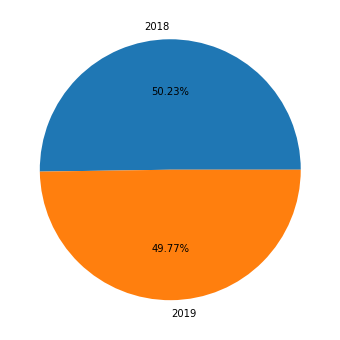

In [ ]:
pie_chart(df_nonull[df_nonull.Bulan == '5'], 'Tahun')

In [ ]:
e = len(df_nonull[df_nonull.Bulan == '6'])
(df_nonull.Target[df_nonull.Bulan=='6'].value_counts())/e*100

0    99.913675
1     0.086325
Name: Target, dtype: float64

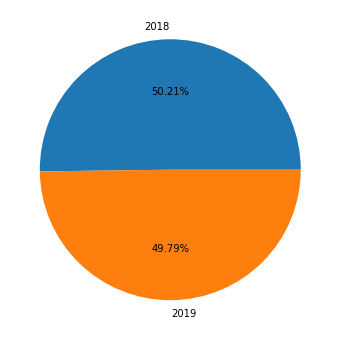

In [ ]:
pie_chart(df_nonull[df_nonull.Bulan == '6'], 'Tahun')

In [ ]:
f = len(df_nonull[df_nonull.Bulan == '7'])
(df_nonull.Target[df_nonull.Bulan=='7'].value_counts())/f*100

0    92.946846
1     7.053154
Name: Target, dtype: float64

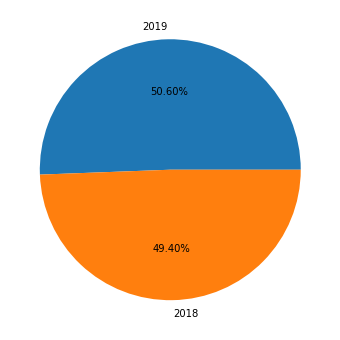

In [ ]:
pie_chart(df_nonull[df_nonull.Bulan == '7'], 'Tahun')

Kesimpulannya orang2 yang memulai untuk ikut asuransi di pertengahan tahun (bulan Mei, Juni, Juli) cenderung untuk tidak melanjutkan lagi 

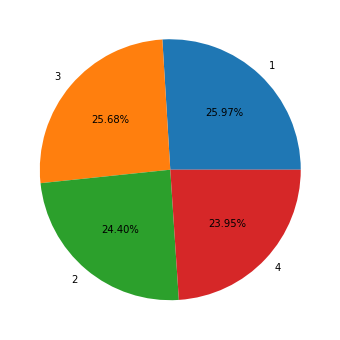

In [ ]:
z = df_nonull[df_nonull.Tahun == '2020']
pie_chart(z, 'Bulan')

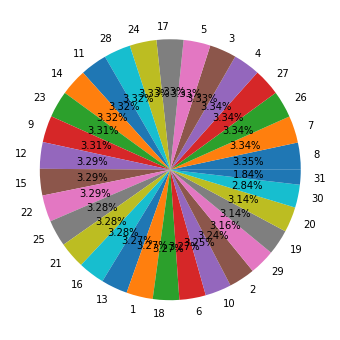

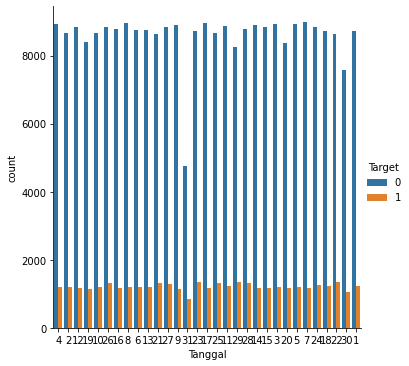

In [ ]:
kategorik(df_nonull, 'Tanggal')

##Tahun Kendaraan

In [ ]:
df['Tahun_Kendaraan'].value_counts()

1-2 Tahun    150132
<1 Tahun     149957
>2 Tahun      15625
Name: Tahun_Kendaraan, dtype: int64

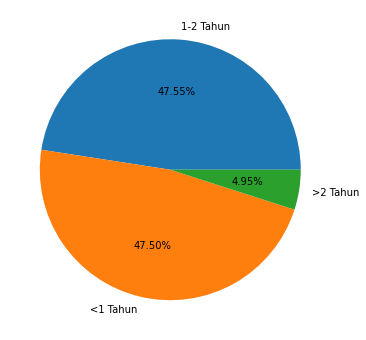

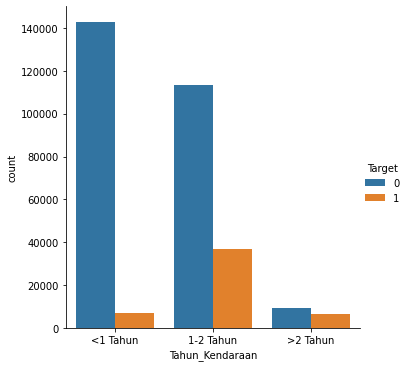

In [ ]:
kategorik(df, 'Tahun_Kendaraan')

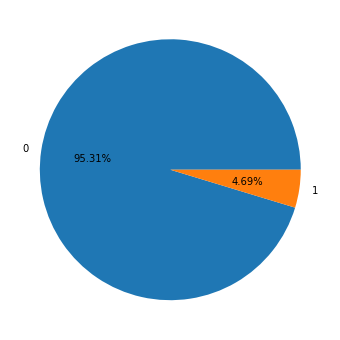

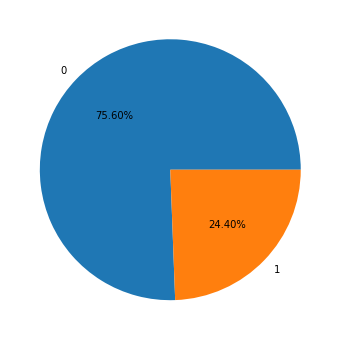

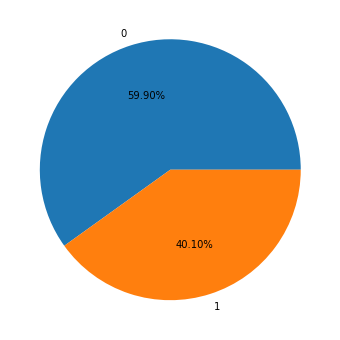

In [ ]:
satu_tahun = df[df.Tahun_Kendaraan == '<1 Tahun']
satu_dua = df[df.Tahun_Kendaraan == '1-2 Tahun']
dua_tahun = df[df.Tahun_Kendaraan=='>2 Tahun']
pie_chart(satu_tahun,'Target')
pie_chart(satu_dua, 'Target')
pie_chart(dua_tahun, 'Target')

##Biaya

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


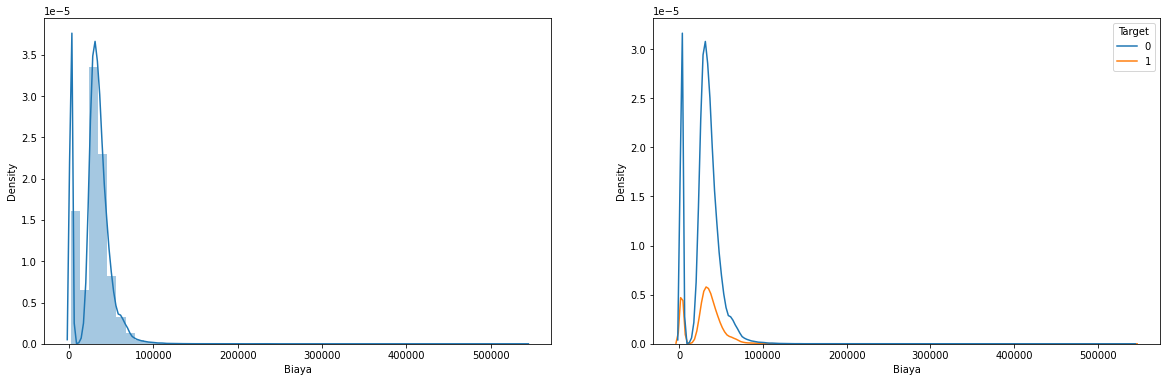

In [ ]:
numerik(df, 'Biaya')

In [ ]:
print("Rentang biaya asuransi yang harus dibayarkan pelanggan tahun ini adalah {} hingga {}".format(df.Biaya.min(), df.Biaya.max()))

Rentang biaya asuransi yang harus dibayarkan pelanggan tahun ini adalah 2630.0 hingga 540165.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


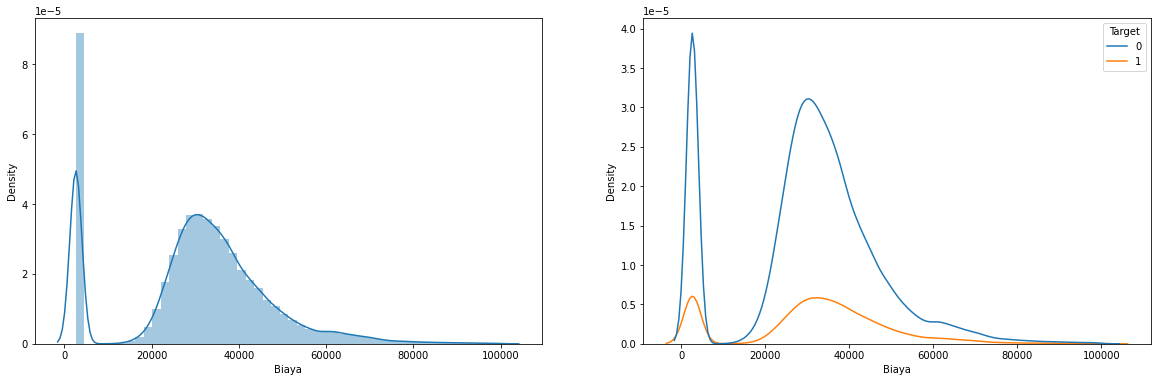

In [ ]:
seratus_ribu_bawah = df[df.Biaya <= 100000]
numerik(seratus_ribu_bawah, 'Biaya')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


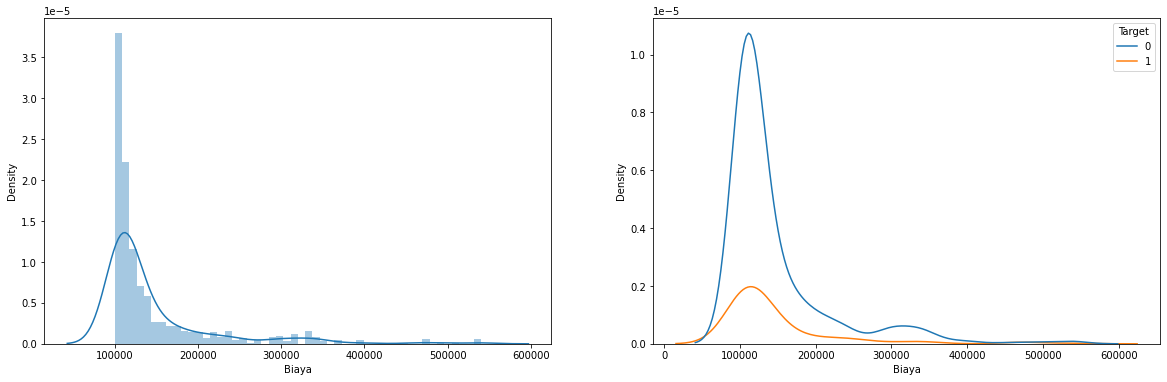

In [ ]:
seratus_ribu_atas = df[df.Biaya > 100000]
numerik(seratus_ribu_atas, 'Biaya')

##Sourcing Channel

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


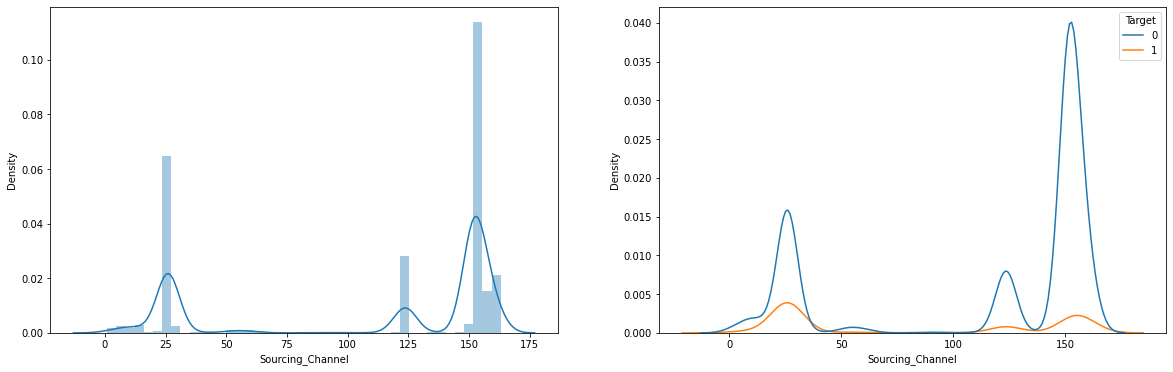

In [ ]:
numerik(df, 'Sourcing_Channel')

##Hari Diasuransikan

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


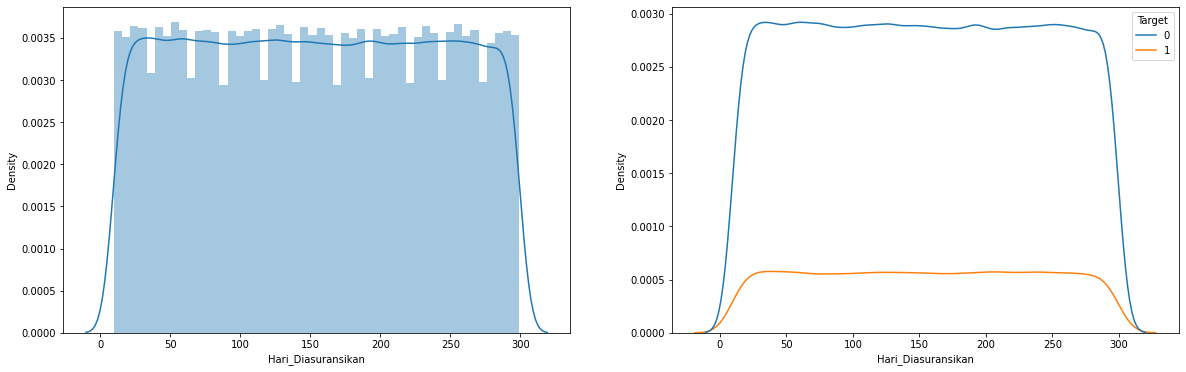

In [ ]:
numerik(df, 'Hari_Diasuransikan')

##Kesimpulan

**Insight yang didapat:**
1. Imbalanced dataset 84% - 16%
2. Seluruh ID unik dan tidak ada instances yg duplikat
3. Gender cukup seimbang
4. 50% pelanggan asuransi berusia 20-awal 30
5. 99.8% pelanggan punya izin mengemudi
6. Kode wilayah cukup random sih
7. Tanggal asuransi sangat menarik
> - 99,92% orang yang berlangganan asuransi dari 2018 tidak melanjutkan
> - Semakin baru orang itu bergabung, probabilitas untuk lanjut semakin besar
> - 99,91% orang yang berlangganan di bulan mei atau juni tidak melanjutkan
> - 92,95% orang yang berlangganan di bulan juli tidak melanjutkan
> - intinya orang yg berlangganan di pertengahan tahun kemungkinan besar tidak melanjutkan
8. 95% kendaraan yang dimiliki berusia < 2 tahun, tapi semakin tua kendaraan probabilitas untuk lanjut semakin besar
9. Biaya yg harus dibayar pelanggan kebanyakan berkisar yaitu < 10k dan 30k
10. Sourcing channel cukup random
11. Hari diasuransikan frekuensi dan proporsinya hampir sama semua



**Preprocess yang harus dilakukan**
0. Split train-validasi
1. Oversampling atau Undersampling
2. Drop variabel id
3. Encode variabel gender
4. -
5. Drop variabel izin mengemudi (gaada variabilitasnya)
6. -
7. Split data tanggal asuransi jadi 3 variabel baru: tanggal, bulan, tahun
8. Encode variabel tahun kendaraan
9. -
10. -
11. -

**Langkah Preprocess**
1. Split train-validasi
2. Drop id dan izin mengemudi
3. Imputasi missing value di semua variabel
4. Split tanggal asuransi jadi 3 variabel: tanggal, bulan, tahun (lalu dijadikann integer)
5. Encode gender dan tahun kendaraan
6. Oversampling - Undersampling

#Preprocessing

##Split Train-Val

In [4]:
from sklearn.model_selection import train_test_split
df_train, df_val = train_test_split(df, stratify = df['Target'], random_state = 456, test_size = 0.2)

In [58]:
df_train

,id,Gender,Umur,Izin_Mengemudi,Kode_Wilayah,Tanggal_Asuransi,Tahun_Kendaraan,Biaya,Sourcing_Channel,Hari_Diasuransikan,Target
25939,91394,Wanita,NaN,1.0,41.0,2/12/2018,<1 Tahun,28372.0,151.0,NaN,0
260068,57559,Pria,25.0,1.0,36.0,12/2/2018,<1 Tahun,2630.0,160.0,66.0,0
314212,209472,Wanita,27.0,NaN,13.0,2/5/2018,<1 Tahun,NaN,152.0,NaN,0
4646,20145,Pria,NaN,1.0,NaN,7/25/2019,1-2 Tahun,41752.0,NaN,NaN,0
306395,496848,Wanita,26.0,NaN,NaN,12/23/2018,<1 Tahun,2630.0,152.0,253.0,0
...,...,...,...,...,...,...,...,...,...,...,...
346563,2145,Wanita,65.0,1.0,28.0,NaN,1-2 Tahun,NaN,55.0,262.0,0
194124,238351,Pria,29.0,1.0,29.0,9/27/2018,<1 Tahun,46302.0,152.0,197.0,0
114176,244209,Pria,23.0,1.0,28.0,9/28/2019,<1 Tahun,29526.0,124.0,165.0,0
290179,277819,Pria,23.0,1.0,36.0,2/18/2020,<1 Tahun,32214.0,152.0,10.0,0


In [28]:
df_val

,id,Gender,Umur,Izin_Mengemudi,Kode_Wilayah,Tanggal_Asuransi,Tahun_Kendaraan,Biaya,Sourcing_Channel,Hari_Diasuransikan,Target
64400,111953,Wanita,45.0,1.0,3.0,11/27/2018,NaN,NaN,26.0,NaN,0
132799,121000,Pria,79.0,1.0,28.0,NaN,NaN,24347.0,26.0,231.0,0
375696,277525,Wanita,NaN,1.0,41.0,12/28/2019,1-2 Tahun,38844.0,NaN,NaN,0
21644,195909,Pria,20.0,1.0,46.0,3/8/2019,<1 Tahun,NaN,160.0,132.0,0
282712,438123,NaN,24.0,1.0,17.0,2/26/2019,<1 Tahun,NaN,152.0,170.0,0
...,...,...,...,...,...,...,...,...,...,...,...
7749,396287,Pria,NaN,NaN,41.0,NaN,<1 Tahun,NaN,NaN,NaN,1
202308,44882,Pria,22.0,1.0,28.0,2/18/2019,<1 Tahun,NaN,154.0,64.0,0
321314,337389,Wanita,40.0,NaN,NaN,8/6/2019,1-2 Tahun,NaN,26.0,NaN,0
155928,20950,Wanita,29.0,1.0,21.0,3/14/2019,<1 Tahun,NaN,152.0,225.0,0


##Drop id dan izin mengemudi

In [5]:
df_train = df_train.drop(['id', 'Izin_Mengemudi'], axis = 1)

In [55]:
df_train

,Gender,Umur,Kode_Wilayah,Tanggal_Asuransi,Tahun_Kendaraan,Biaya,Sourcing_Channel,Hari_Diasuransikan,Target
25939,Wanita,NaN,41.0,2/12/2018,<1 Tahun,28372.0,151.0,NaN,0
260068,Pria,25.0,36.0,12/2/2018,<1 Tahun,2630.0,160.0,66.0,0
314212,Wanita,27.0,13.0,2/5/2018,<1 Tahun,NaN,152.0,NaN,0
4646,Pria,NaN,NaN,7/25/2019,1-2 Tahun,41752.0,NaN,NaN,0
306395,Wanita,26.0,NaN,12/23/2018,<1 Tahun,2630.0,152.0,253.0,0
...,...,...,...,...,...,...,...,...,...
346563,Wanita,65.0,28.0,NaN,1-2 Tahun,NaN,55.0,262.0,0
194124,Pria,29.0,29.0,9/27/2018,<1 Tahun,46302.0,152.0,197.0,0
114176,Pria,23.0,28.0,9/28/2019,<1 Tahun,29526.0,124.0,165.0,0
290179,Pria,23.0,36.0,2/18/2020,<1 Tahun,32214.0,152.0,10.0,0


##Handling missing value

In [63]:
df_train.isnull().sum()/len(df_train)*100

Gender                 8.365743
Umur                  25.176058
Kode_Wilayah          21.996382
Tanggal_Asuransi      20.444324
Tahun_Kendaraan       17.409550
Biaya                 33.129663
Sourcing_Channel      21.872414
Hari_Diasuransikan    19.756773
Target                 0.000000
dtype: float64

In [64]:
df_train['Target'].value_counts()

0    255642
1     50081
Name: Target, dtype: int64

**Trimming data yang variabel tanggal asuransi dan tahun kendaraannya null (hanya untuk data dengan target 0)**

In [65]:
a = df_train.loc[df_train['Tanggal_Asuransi'].isnull() & df_train['Tahun_Kendaraan'].isnull()]
b = a.loc[a['Target'] == 0]
indeks = b.index
df_train = df_train.drop(indeks, axis = 0)

**imputasi missing value**

In [66]:
f = lambda x: x.median() if np.issubdtype(x.dtype, np.number) else x.mode().iloc[0]
df_train = df_train.fillna(df_train.groupby('Target').transform(f))

In [69]:
df_train.isnull().sum()

Gender                0
Umur                  0
Kode_Wilayah          0
Tanggal_Asuransi      0
Tahun_Kendaraan       0
Biaya                 0
Sourcing_Channel      0
Hari_Diasuransikan    0
Target                0
dtype: int64

##Split tanggal asuransi + jadiin integer

In [84]:
df_train[['Bulan', 'Tanggal', 'Tahun']] = df_train.Tanggal_Asuransi.str.split("/", expand=True)
df_train[['Bulan', 'Tanggal', 'Tahun']] = df_train[['Bulan', 'Tanggal', 'Tahun']].astype(int)

In [98]:
df_train = df_train.drop('Tanggal_Asuransi', axis = 1)

##Encode gender dan tahun kendaraam

In [93]:
df_train['Gender'] = df_train['Gender'].replace(['Pria','Wanita'],[0, 1])
df_train['Tahun_Kendaraan'] = df_train['Tahun_Kendaraan'].replace(['<1 Tahun','1-2 Tahun', '>2 Tahun'],[1,2,3])

In [99]:
df_train

,Gender,Umur,Kode_Wilayah,Tahun_Kendaraan,Biaya,Sourcing_Channel,Hari_Diasuransikan,Target,Bulan,Tanggal,Tahun
25939,1,28,41,1,28372,151,154,0,2,12,2018
260068,0,25,36,1,2630,160,66,0,12,2,2018
314212,1,27,13,1,31581,152,154,0,2,5,2018
4646,0,28,28,2,41752,152,154,0,7,25,2019
306395,1,26,28,1,2630,152,253,0,12,23,2018
...,...,...,...,...,...,...,...,...,...,...,...
346563,1,65,28,2,31581,55,262,0,5,11,2019
194124,0,29,29,1,46302,152,197,0,9,27,2018
114176,0,23,28,1,29526,124,165,0,9,28,2019
290179,0,23,36,1,32214,152,10,0,2,18,2020


In [100]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297898 entries, 25939 to 11201
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype
---  ------              --------------   -----
 0   Gender              297898 non-null  int64
 1   Umur                297898 non-null  int64
 2   Kode_Wilayah        297898 non-null  int64
 3   Tahun_Kendaraan     297898 non-null  int64
 4   Biaya               297898 non-null  int64
 5   Sourcing_Channel    297898 non-null  int64
 6   Hari_Diasuransikan  297898 non-null  int64
 7   Target              297898 non-null  int64
 8   Bulan               297898 non-null  int64
 9   Tanggal             297898 non-null  int64
 10  Tahun               297898 non-null  int64
dtypes: int64(11)
memory usage: 27.3 MB


##Oversampling-Undersampling

In [102]:
df_train['Target'].value_counts()/len(df_train)

0    0.831885
1    0.168115
Name: Target, dtype: float64

In [103]:
x_train = df_train.drop('Target', axis = 1)
y_train = df_train['Target']

In [104]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 456)
x_train, y_train = smote.fit_sample(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [116]:
len(x_train)

495634

#Modeling

##Decision Tree

In [118]:
#modelling decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
classifier = DecisionTreeClassifier()
parameters = {'random_state': [123],'criterion': ['gini', 'entropy'], 'max_depth': [5, 10, 15], 'max_features': ['auto', 'sqrt', 'log2']}
model_tree = GridSearchCV(classifier, parameters, cv = 10)
model_tree.fit(x_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                  

In [119]:
#data evaluation preparing
def preprocess(dataset):
  #hapus variabel id dan izin mengemudi
  df_baru = dataset.drop(['id', 'Izin_Mengemudi'], axis = 1)
  #imputasi missing value
  f = lambda x: x.median() if np.issubdtype(x.dtype, np.number) else x.mode().iloc[0]
  df_baru = df_baru.fillna(df_baru.groupby('Target').transform(f))
  #split tanggal asuransi
  df_baru[['Bulan', 'Tanggal', 'Tahun']] = df_baru.Tanggal_Asuransi.str.split("/", expand=True)
  df_baru[['Bulan', 'Tanggal', 'Tahun']] = df_baru[['Bulan', 'Tanggal', 'Tahun']].astype(int)
  df_baru = df_baru.drop('Tanggal_Asuransi', axis = 1)
  #encoding
  df_baru['Gender'] = df_baru['Gender'].replace(['Pria','Wanita'],[0, 1])
  df_baru['Tahun_Kendaraan'] = df_baru['Tahun_Kendaraan'].replace(['<1 Tahun','1-2 Tahun', '>2 Tahun'],[1,2,3])
  return df_baru

In [120]:
df_validation = preprocess(df_val)
x_val = df_validation.drop('Target', axis = 1)
y_val = df_validation['Target']

In [1]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
def evaluate(model):
  prediksi_train = model.predict(x_train)
  prediksi_val = model.predict(x_val)
  proba_train = model.predict_proba(x_train)
  proba_val = model.predict_proba(x_val)
  cm = confusion_matrix(y_val, prediksi_val)
  sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
  specificity = cm[1,1]/(cm[1,0]+cm[1,1])
  print("Best Parameter:", model.best_params_)
  print('Akurasi data train:', accuracy_score(y_train, prediksi_train))
  print('Akurasi data validasi:', accuracy_score(y_val, prediksi_val))
  print('Sensitivity data validasi:', sensitivity )
  print('Specificity data validasi:', specificity)
  print('AUC data train:', roc_auc_score(y_train, proba_train[:, 1]))
  print('AUC data validasi:', roc_auc_score(y_val, proba_val[:, 1]))

In [138]:
evaluate(model_tree)

Best Parameter: {'criterion': 'gini', 'max_depth': 15, 'max_features': 'auto', 'random_state': 123}
Akurasi data train: 0.9501446631990541
Akurasi data validasi: 0.8672004814800277
Sensitivity data validasi: 0.8720408067468823
Specificity data validasi: 0.8424920127795528
AUC data train: 0.9897398343504
AUC data validasi: 0.9154042921258861


##Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
parameters = {'bootstrap': [True], 'random_state': [123], 'n_estimators': [25, 50, 100, 500, 1000], 'max_features': ['auto', 'sqrt', 'log2']}
model_rf = GridSearchCV(classifier, parameters, cv = 10)
model_rf.fit(x_train, y_train)

In [4]:
classifier

NameError: ignored

##Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier()
parameters = {'max_depth': [10, 15, 20, 25, 50], 'n_estimators': [25, 50, 100, 500, 1000], 'learning_rate': [0.1, 0.3, 0.5, 0.8, 1]}
model_gb = GridSearchCV(classifier, parameters, cv = 10)
model_gb.fit(x_train, y_train)

##AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
classifier = AdaBoostClassifier()
parameters = {'n_estimators': [25, 50, 100, 500, 1000], 'learning_rate': [0.1, 0.3, 0.5, 0.8, 1]}
model_ada = GridSearchCV(classifier, parameters, cv = 10)
model_ada.fit(x_train, y_train)

##XGBoost

In [ ]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
parameters = {'booster':['dart', 'gbtree'], 'tree_method':['auto','approx','hist'], 'subsample':[0.5,1],'max_depth' : [1,6,10]}
model_xgb = GridSearchCV(classifier, parameters, cv=10)
model_xgb.fit(x_train, y_train)

##kNN

SVM

#Evaluation

#Prediction

In [ ]:
x_test = scaler.fit_transform(dftest)

In [ ]:
prediksi = model_xgb.predict_proba(x_test)[:,1]

In [ ]:
dfpredik=pd.DataFrame(prediksi)